In [1]:
#!pip install geopandas

import geopandas as gpd

In [ ]:
# Mount my Google Drive to Colab
#from google.colab import drive
#drive.mount("/content/gdrive")

# Upload Files from computer
from google.colab import files
uploaded = files.upload()

In [6]:
# Read shapefiles
countries_gpd = gpd.read_file("C:/Users/jfeng/Graduate School Coursework Materials/AAG Machine Learning Workshop/SeagrassData/Data/Countries_2007.shp")
coastline_gpd = gpd.read_file("C:/Users/jfeng/Graduate School Coursework Materials/AAG Machine Learning Workshop/SeagrassData/Data/coastline_attr_seagrass.shp")
coastline_gpd.head(10)

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,sea_grass,geometry
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,1,POINT (-82.22100 24.50021)
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,1,POINT (-81.16694 25.14926)
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,0,POINT (-90.58674 29.24938)
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,1,POINT (-76.05466 36.96940)
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,1,POINT (-76.38891 39.27398)
5,1,32.8363,-23.88640,2.49948,0.447603,2.762620,6.09137,11.0929,1,POINT (-74.61972 39.19935)
6,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,0,POINT (-90.36159 29.29488)
7,1,30.0744,-9.92311,2.24761,0.424255,2.441740,6.03015,13.3154,0,POINT (-74.98192 39.06316)
8,1,34.4902,-5.78819,1.04916,0.137414,0.312963,4.83985,21.0649,0,POINT (-80.64154 32.16147)
9,1,33.2107,-66.57840,14.07950,1.038130,8.105710,5.11104,10.9927,0,POINT (-123.83192 39.31507)


<AxesSubplot:>

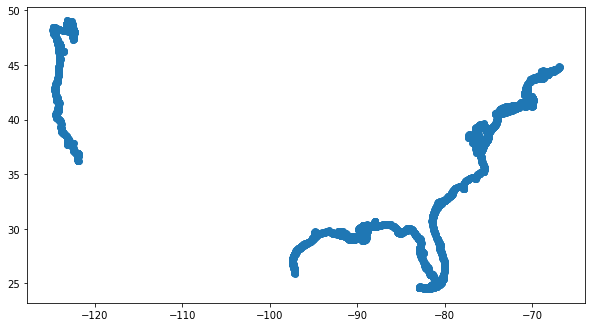

In [11]:
# Plot coastline
coastline_gpd.plot(figsize=(10,8))

In [13]:
# Geospatial feature engineering
coastline_gpd["x"], coastline_gpd["y"] = coastline_gpd.geometry.x, coastline_gpd.geometry.y

In [15]:
# Dividing data into training and testing sets
train = coastline_gpd.sample(frac=0.8, random_state=42)
test = coastline_gpd.drop(train.index)

In [16]:
# Prepare train and test data
train_label = train.pop("sea_grass")
test_label = test.pop("sea_grass")
train = train[["salinity","srtm30","silicate","phosphate","disso2","temp","nitrate","x","y"]]
test = test[["salinity","srtm30","silicate","phosphate","disso2","temp","nitrate","x","y"]]

In [18]:
# Create and train decision tree and random forest models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)
random_forest_model = RandomForestClassifier(random_state=42, min_samples_leaf=10)
decision_tree_model.fit(train, train_label)
random_forest_model.fit(train, train_label)

RandomForestClassifier(min_samples_leaf=10, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score
y_pred_1 = decision_tree_model.predict(test)
accuracy_1 = accuracy_score(test_label,y_pred_1)
y_pred_2 = random_forest_model.predict(test)
accuracy_2 = accuracy_score(test_label,y_pred_2)

In [21]:
accuracy_1

0.9845

In [22]:
accuracy_2

0.984